In [1]:
#R Script for Project#
library(TSA)
library(vars)
## Granger Causality: Wald Test
library(aod)


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Loading required package: MASS
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest
Warning message:
"package 'aod' was built under R version 3.6.3"

In [2]:
data=read.csv("MooseData.csv",header=T)       
names(data)=c("year", "fairbanksPop", "mooseHarvest", "totalMoose", "avgSnow", "wolfPop") 

years=data[,"year"] 
ts_fairbanksPop=ts(data[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data[,"wolfPop"],start=1965, freq=1)

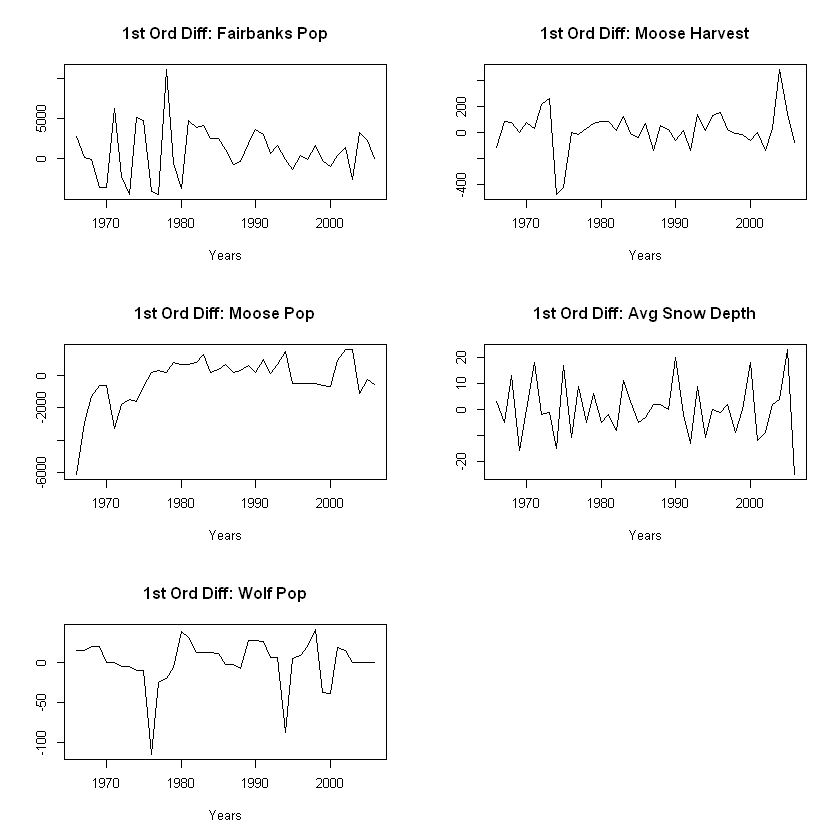

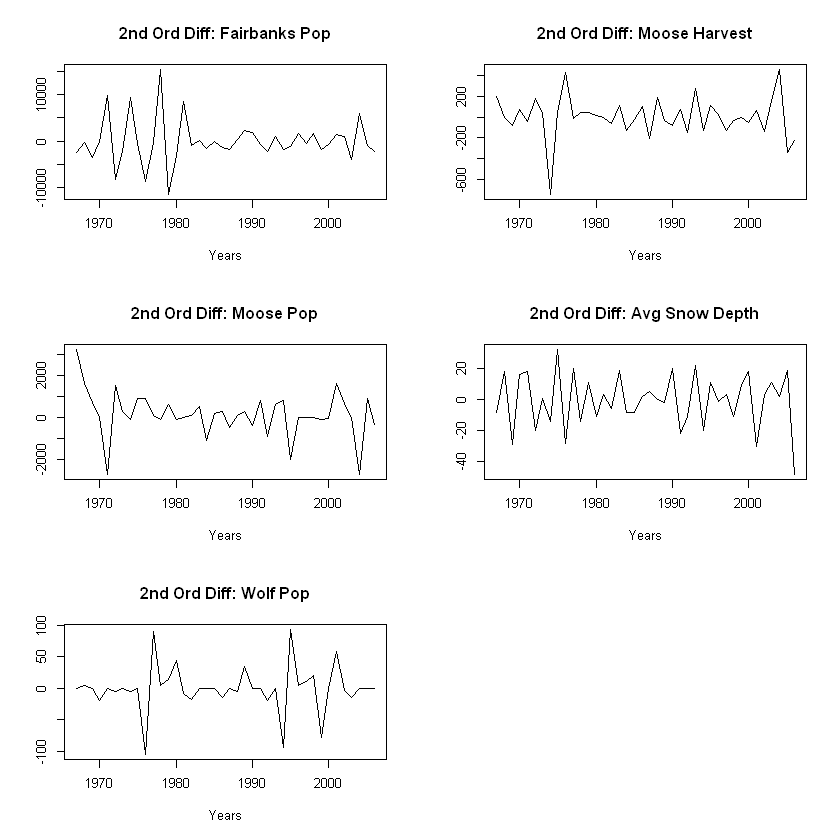

In [3]:
##Total Moose Population##
par(mfrow=c(3,2))
plot(diff(ts_fairbanksPop),xlab="Years",ylab="",main="1st Ord Diff: Fairbanks Pop",type="l")
plot(diff(ts_mooseHarvest),xlab="Years",ylab="",main="1st Ord Diff: Moose Harvest",type="l")
plot(diff(ts_totalMoose),xlab="Years",ylab="",main="1st Ord Diff: Moose Pop",type="l")
plot(diff(ts_avgSnow),xlab="Years",ylab="",main="1st Ord Diff: Avg Snow Depth",type="l")
plot(diff(ts_wolfPop),xlab="Years",ylab="",main="1st Ord Diff: Wolf Pop",type="l")

par(mfrow=c(3,2))
plot(diff(ts_fairbanksPop,differences = 2),xlab="Years",ylab="",main="2nd Ord Diff: Fairbanks Pop",type="l")
plot(diff(ts_mooseHarvest,differences = 2),xlab="Years",ylab="",main="2nd Ord Diff: Moose Harvest",type="l")
plot(diff(ts_totalMoose,differences = 2),xlab="Years",ylab="",main="2nd Ord Diff: Moose Pop",type="l")
plot(diff(ts_avgSnow,differences = 2),xlab="Years",ylab="",main="2nd Ord Diff: Avg Snow Depth",type="l")
plot(diff(ts_wolfPop,differences = 2),xlab="Years",ylab="",main="2nd Ord Diff: Wolf Pop",type="l")


In [4]:
n = nrow(data)
data.train=data[1:(n-4),]
data.test=data[(n-3):n,]

ts_fairbanksPop=ts(data.train[,"fairbanksPop"],start=1965, freq=1)
ts_mooseHarvest=ts(data.train[,"mooseHarvest"],start=1965, freq=1)
ts_totalMoose=ts(data.train[,"totalMoose"],start=1965, freq=1)
ts_avgSnow=ts(data.train[,"avgSnow"],start=1965, freq=1)
ts_wolfPop=ts(data.train[,"wolfPop"],start=1965, freq=1)

dts_fairbanksPop= diff(ts_fairbanksPop)
dts_mooseHarvest= diff(ts_mooseHarvest)
dts_totalMoose= diff(ts_totalMoose)
dts_avgSnow= diff(ts_avgSnow)
dts_wolfPop= diff(ts_wolfPop)


In [6]:
###VAR Model##
ddata.train=cbind(dts_fairbanksPop,dts_mooseHarvest,dts_totalMoose, dts_avgSnow,dts_wolfPop)
##Model Selection
VARselect(ddata.train, lag.max = 20)$selection

## Model Fitting: Unrestricted VAR with default type=constant
model.var=VAR(ddata.train, p=4)
summary(model.var)


Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      4      4      3


VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 33 
Log Likelihood: -948.698 
Roots of the characteristic polynomial:
0.9177 0.9177 0.9135 0.9135 0.8969 0.8969 0.8698 0.8698 0.8096 0.8096 0.8001 0.8001 0.7872 0.7872 0.7287 0.7287 0.6111 0.5974 0.5974 0.3662
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_fairbanksPop.l1 + dts_mooseHarvest.l1 + dts_totalMoose.l1 + dts_avgSnow.l1 + dts_wolfPop.l1 + dts_fairbanksPop.l2 + dts_mooseHarvest.l2 + dts_totalMoose.l2 + dts_avgSnow.l2 + dts_wolfPop.l2 + dts_fairbanksPop.l3 + dts_mooseHarvest.l3 + dts_totalMoose.l3 + dts_avgSnow.l3 + dts_wolfPop.l3 + dts_fairbanksPop.l4 + dts_mooseHarvest.l4 + dts_totalMoose.l4 + dts_avgSnow.l4 + dts_wolfPop.l4 + const 

                      Estimate Std. Error t value Pr(>|t|)  
dts_fairbanksPop.l1    0.15897    0.27730   0.573   0

In [14]:
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)



VAR Estimation Results:
Endogenous variables: dts_fairbanksPop, dts_mooseHarvest, dts_totalMoose, dts_avgSnow, dts_wolfPop 
Deterministic variables: const 
Sample size: 33 
Log Likelihood: -1020.759 
Roots of the characteristic polynomial:
0.7838 0.7838 0.7838 0.7838 0.7795 0.7795 0.7372 0.7372 0.7372 0.7372 0.6707 0.5935 0.5935 1.248e-08 1.248e-08     0     0     0     0     0
Call:
VAR(y = ddata.train, p = 4)


Estimation results for equation dts_fairbanksPop: 
dts_fairbanksPop = dts_totalMoose.l1 + dts_fairbanksPop.l2 + dts_avgSnow.l3 + const 

                     Estimate Std. Error t value Pr(>|t|)    
dts_totalMoose.l1      1.1185     0.4198   2.665 0.012459 *  
dts_fairbanksPop.l2   -0.6076     0.1200  -5.062 2.13e-05 ***
dts_avgSnow.l3       166.5828    43.5778   3.823 0.000646 ***
const               1680.5147   408.6307   4.113 0.000294 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 2252 on 29 degrees of freedom
Multiple R-

In [15]:
#coefficients(model.var)$dts_totalMoose
#vcov(model.var)
var.model = vcov(model.var)[44:63,44:63]
var.model

,dts_totalMoose:dts_fairbanksPop.l1,dts_totalMoose:dts_mooseHarvest.l1,dts_totalMoose:dts_totalMoose.l1,dts_totalMoose:dts_avgSnow.l1,dts_totalMoose:dts_wolfPop.l1,dts_totalMoose:dts_fairbanksPop.l2,dts_totalMoose:dts_mooseHarvest.l2,dts_totalMoose:dts_totalMoose.l2,dts_totalMoose:dts_avgSnow.l2,dts_totalMoose:dts_wolfPop.l2,dts_totalMoose:dts_fairbanksPop.l3,dts_totalMoose:dts_mooseHarvest.l3,dts_totalMoose:dts_totalMoose.l3,dts_totalMoose:dts_avgSnow.l3,dts_totalMoose:dts_wolfPop.l3,dts_totalMoose:dts_fairbanksPop.l4,dts_totalMoose:dts_mooseHarvest.l4,dts_totalMoose:dts_totalMoose.l4,dts_totalMoose:dts_avgSnow.l4,dts_totalMoose:dts_wolfPop.l4
dts_totalMoose:dts_fairbanksPop.l1,0.0088621459,0.044622024,0.001395666,-0.7314509,-1.564328e-02,0.0007655575,0.02990741,-0.0108481656,-0.8646776,-0.14988192,0.0045470104,-0.046762236,0.002510509,-0.3386998,0.15862094,-0.0008049612,0.02205552,-0.006401023,-1.08618486,-0.14014841
dts_totalMoose:dts_mooseHarvest.l1,0.0446220238,2.116624511,0.014332917,-0.8925932,-1.527634e+00,0.0167785383,-0.26816998,0.0312868785,1.0048234,-3.54560573,0.0084249726,0.465268896,-0.057720490,2.6211323,1.63369337,0.0304891860,0.70187890,-0.073649878,3.80233132,-1.75680331
dts_totalMoose:dts_totalMoose.l1,0.0013956657,0.014332917,0.073920627,2.4837496,-3.956825e-01,-0.0080248357,0.14995216,-0.0287656136,1.4236005,-0.56183747,-0.0039101710,0.063423532,0.010092740,1.7758403,0.28278590,-0.0040627623,0.17388094,-0.014869031,1.29566687,-0.05032193
dts_totalMoose:dts_avgSnow.l1,-0.7314509487,-0.892593221,2.483749607,724.7038281,-7.621476e+01,-0.3810917415,10.27585382,1.8504430284,553.9553465,-8.29348677,-0.4878640689,14.333657176,0.396999253,458.6313748,-43.47329412,0.2416006028,20.67286333,-1.462640257,242.15521124,3.12080692
dts_totalMoose:dts_wolfPop.l1,-0.0156432756,-1.527634287,-0.395682499,-76.2147614,6.940037e+01,0.2451360461,-2.27623704,-0.2505662404,-125.4159842,0.71988100,0.0016192308,-8.897702904,-1.109875090,-153.9633264,-4.17192147,0.1214637928,-2.90811156,0.631961311,-42.91172949,12.55956582
dts_totalMoose:dts_fairbanksPop.l2,0.0007655575,0.016778538,-0.008024836,-0.3810917,2.451360e-01,0.0071317326,0.01131662,0.0008280724,-1.0933041,-0.03043867,0.0019735195,-0.026702769,-0.011655869,-0.9893788,-0.19296301,0.0033890306,-0.03293058,0.002506414,-0.14583550,0.15119082
dts_totalMoose:dts_mooseHarvest.l2,0.0299074062,-0.268169976,0.149952159,10.2758538,-2.276237e+00,0.0113166189,2.27288134,-0.0957905687,-1.0682073,-2.17215653,0.0116557707,-0.388822963,0.103113447,5.2829789,-1.24136600,-0.0207966671,0.92198130,-0.120574731,-2.19564737,1.12339991
dts_totalMoose:dts_totalMoose.l2,-0.0108481656,0.031286879,-0.028765614,1.8504430,-2.505662e-01,0.0008280724,-0.09579057,0.0993102405,3.5139031,0.16441059,-0.0104601831,0.157071422,-0.038991416,2.1437134,-0.66865107,0.0013501550,0.07664470,0.003579160,1.29045200,0.37018581
dts_totalMoose:dts_avgSnow.l2,-0.8646775769,1.004823434,1.423600483,553.9553465,-1.254160e+02,-1.0933041030,-1.06820728,3.5139031316,1061.3303929,-54.84678474,-0.9493003841,26.605456224,2.429106747,812.2130600,20.09854020,-0.1014034825,25.37807920,-1.568829698,448.37236151,-39.50906863
dts_totalMoose:dts_wolfPop.l2,-0.1498819170,-3.545605731,-0.561837466,-8.2934868,7.198810e-01,-0.0304386729,-2.17215653,0.1644105929,-54.8467847,62.07451933,0.0396558015,-2.151309907,-0.182856810,-50.9222951,-14.23426583,-0.0720355923,-8.75789313,0.325503137,-74.40077571,6.74171050


In [16]:
coef.moosepop = coefficients(model.var)$dts_totalMoose[-(5*4+1),1]
var.model = vcov(model.var)[44:63,44:63]
## Granger Causality: Fairbanks Population
wald.test(b=coef.moosepop, var.model, Terms=seq(1, 5*4, 5))
## Granger Causality: Moose Harvest
wald.test(b=coef.moosepop, var.model, Terms=seq(2, 5*4, 5))
## Granger Causality: Average Snow Fall
wald.test(b=coef.moosepop, var.model, Terms=seq(4, 5*4, 5))
## Granger Causality: Wolf Population
wald.test(b=coef.moosepop, var.model, Terms=seq(5, 5*4, 5))
## Granger Causality: Wolf Population & Fairbanks Population
wald.test(b=coef.moosepop, var.model, Terms=c(seq(1, 5*4, 5),seq(5, 5*4, 5)))

Wald test:
----------

Chi-squared test:
X2 = 1.9, df = 4, P(> X2) = 0.76

Wald test:
----------

Chi-squared test:
X2 = 2.9, df = 4, P(> X2) = 0.57

Wald test:
----------

Chi-squared test:
X2 = 3.7, df = 4, P(> X2) = 0.45

Wald test:
----------

Chi-squared test:
X2 = 2.4, df = 4, P(> X2) = 0.67

Wald test:
----------

Chi-squared test:
X2 = 3.5, df = 8, P(> X2) = 0.9

In [17]:
## Reduced VAR Model##
ddata.train=cbind(dts_mooseHarvest,dts_totalMoose, dts_avgSnow)
##Model Selection
VARselect(ddata.train, lag.max = 20)$selection

## Model Fitting: Unrestricted VAR
model.var=VAR(ddata.train, p=5)
summary(model.var)
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)
## Granger Causality
p=5
nfactor=3
coef.moosepop = coefficients(model.var)$dts_totalMoose[-(nfactor*p+1),1]
var.model = vcov(model.var)[1:(nfactor*p),1:(nfactor*p)]
## Moose Harvest
wald.test(b=coef.moosepop, var.model, Terms=seq(1, nfactor*p, nfactor))
## Snow Fall
wald.test(b=coef.moosepop, var.model, Terms=seq(3, nfactor*p, nfactor))

Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"Warning message in log(sigma.det):
"NaNs produced"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     6      6      6      5


VAR Estimation Results:
Endogenous variables: dts_mooseHarvest, dts_totalMoose, dts_avgSnow 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: -527.143 
Roots of the characteristic polynomial:
0.9065 0.9065 0.8668 0.8668 0.8601 0.8601 0.8236 0.8236 0.8079 0.7991 0.7991 0.7798 0.7798 0.6226 0.1166
Call:
VAR(y = ddata.train, p = 5)


Estimation results for equation dts_mooseHarvest: 
dts_mooseHarvest = dts_mooseHarvest.l1 + dts_totalMoose.l1 + dts_avgSnow.l1 + dts_mooseHarvest.l2 + dts_totalMoose.l2 + dts_avgSnow.l2 + dts_mooseHarvest.l3 + dts_totalMoose.l3 + dts_avgSnow.l3 + dts_mooseHarvest.l4 + dts_totalMoose.l4 + dts_avgSnow.l4 + dts_mooseHarvest.l5 + dts_totalMoose.l5 + dts_avgSnow.l5 + const 

                    Estimate Std. Error t value Pr(>|t|)   
dts_mooseHarvest.l1  0.16780    0.18888   0.888  0.38749   
dts_totalMoose.l1   -0.09928    0.03231  -3.073  0.00728 **
dts_avgSnow.l1      -4.29164    2.64373  -1.623  0.12405   
dts_mooseHarvest.l2 -0.31587    0.162


VAR Estimation Results:
Endogenous variables: dts_mooseHarvest, dts_totalMoose, dts_avgSnow 
Deterministic variables: const 
Sample size: 32 
Log Likelihood: -563.197 
Roots of the characteristic polynomial:
0.8272 0.7564 0.7564 0.6907 0.6907 0.6889 0.6889 0.3904     0     0     0     0     0     0     0
Call:
VAR(y = ddata.train, p = 5)


Estimation results for equation dts_mooseHarvest: 
dts_mooseHarvest = dts_totalMoose.l3 + dts_totalMoose.l5 

                  Estimate Std. Error t value Pr(>|t|)    
dts_totalMoose.l3  0.11452    0.02370   4.831 3.75e-05 ***
dts_totalMoose.l5 -0.04664    0.01532  -3.045  0.00482 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 113.7 on 30 degrees of freedom
Multiple R-Squared: 0.4406,	Adjusted R-squared: 0.4033 
F-statistic: 11.82 on 2 and 30 DF,  p-value: 0.0001642 


Estimation results for equation dts_totalMoose: 
dts_totalMoose = dts_totalMoose.l1 + dts_mooseHarvest.l2 + dts_totalMoose.l5 

   

Wald test:
----------

Chi-squared test:
X2 = 1.2, df = 5, P(> X2) = 0.94

Wald test:
----------

Chi-squared test:
X2 = 5796549.7, df = 5, P(> X2) = 0.0

In [18]:
## Model Forecasting


pred.model=predict(model.var,n.ahead=4)
dmoosepop.fcst = pred.model[[1]]$dts_totalMoose[,1]
final.pred.3 = rep(0,4)
final.pred.3[1] = ts_totalMoose[(n-4)]+dmoosepop.fcst[1]
final.pred.3[2] = final.pred.3[1]+dmoosepop.fcst[2]
final.pred.3[3] = final.pred.3[2]+dmoosepop.fcst[3]
final.pred.3[4] = final.pred.3[3]+dmoosepop.fcst[4]

In [19]:
totalMoose = data[,"totalMoose"]
n = length(totalMoose)
nfit = n-4
train.totalMoose= totalMoose[1:nfit]
ts.train.totalMoose = ts(train.totalMoose,start=1965, freq=1)




In [20]:
## Forecasting Trend+ARMA: 4 years ahead #####
## Predict trend
library(mgcv)
time.pts = c(1:length(totalMoose))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
x = time.pts[1:nfit]
gam.fit.tr = gam(train.totalMoose~s(x))
newdata = data.frame(x=time.pts[(nfit+1):n])
moose.fit.gam = fitted(gam.fit.tr)
moose.fit.gam = ts(moose.fit.gam,start=1965, freq=1)
resid.process = train.totalMoose-moose.fit.gam
resid.process = ts(resid.process,start=1965, freq=1)
gam.pred= predict(gam.fit.tr,newdata = newdata,interval=c("prediction"))

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.

Attaching package: 'mgcv'

The following object is masked from 'package:aod':

    negbin



In [21]:
## Predict staionary residual process
## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
   for(j in 1:norder){
    modij = arima(resid.process,order = c(p[i],0,q[j]), method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*nfit/(nfit-p[i]-q[j]-2)
   }  
 }
aicv = as.vector(aic)  
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1 #2
qorder = indexq[indexaic]-1 #3

In [22]:
## Fit ARMA Model
final_model.1 = arima(resid.process,order = c(porder,0,qorder), method='ML')



In [23]:
## Predict ARMA
outpredresid = predict(final_model.1,n.ahead=4)$pred
final.pred.1 = outpredresid+gam.pred



In [24]:
## Forecasting using ARIMA ####
final_model.2 = arima(ts_totalMoose, order = c(porder,1,qorder), method = "ML")
outtotal = arima(ts.train.totalMoose[1:nfit], order = c(porder,1,qorder),method = "ML")
final.pred.2 = as.numeric(predict(outtotal,n.ahead=4)$pred)

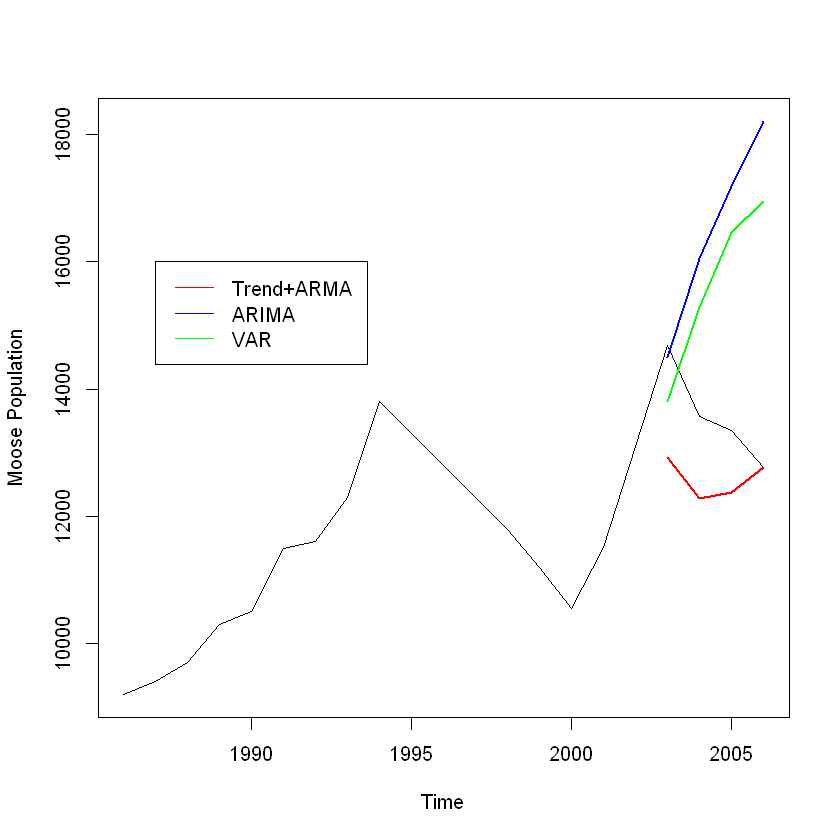

In [25]:
### Compare Predictions
ts_totalMoose = ts(totalMoose,start=1965, freq=1)
ymin = min(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2,final.pred.3))
ymax = max(c(ts_totalMoose[(n-20):n],final.pred.1,final.pred.2,final.pred.3))
plot(years[(n-20):n], ts_totalMoose[(n-20):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="Moose Population")
lines(years[(nfit+1):n],final.pred.1,col="red",lwd=2)
lines(years[(nfit+1):n],final.pred.2,col="blue",lwd=2)
lines(years[(nfit+1):n],final.pred.3,col="green",lwd=2)
legend(1987,16000,legend=c("Trend+ARMA","ARIMA","VAR"),col=c("red","blue","green"),lty=1)
